### Loading files

In [1]:
import pandas as pd
news_data=pd.read_json("E:/ml project/News_Category_Dataset_v2/News_Category_Dataset_v2.json", lines=True)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.display.max_colwidth = 100

### Data Exploration and cleaning

In [2]:
##checking data
news_data

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95c4e1,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets fr...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,,https://www.huffingtonpost.com/entry/maria-sharapova-stunned-victoria-azarenka-australian-open_u...,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, ...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",,https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,,https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 201...,2012-01-28


In [3]:
####datahape
news_data.shape

(200853, 6)

In [4]:
###Combining headline and short_discription for better results
news_data['X']= news_data['headline']+' '+news_data['short_description']

In [5]:
##dropping headline and short_discription
news_data=news_data.drop(["headline","short_description"],axis=1)

In [6]:
##checking count of each category
news_data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

##### As we can see there are categories that have same data for example ARTS & CULTURE and CULTURE & ARTS and there are categories that we can combine like 'LATINO VOICES','BLACK VOICES','QUEER VOICES','WOMEN' So, combining various categories

In [7]:
def grouping(list_cat,rename):
    for i in list_cat:
        news_data['category'] = news_data['category'].apply(lambda x: rename if x == i else x)

In [8]:
grouping(['ARTS', 'ARTS & CULTURE', 'CULTURE & ARTS'] , 'ARTS & CULTURE')
grouping(['ENTERTAINMENT', 'COMEDY'], 'ENTERTAINMENT')
grouping(['EDUCATION','COLLEGE'] , 'EDUCATION & COLLEGE')
grouping(['ENVIRONMENT','GREEN'] , 'ENVIRONMENT')
grouping(['PARENTING','PARENTS'] , 'PARENTING')
grouping(['TECH','SCIENCE'] , 'SCIENCE & TECHNOLOGY')
grouping(['WEDDINGS','DIVORCE'] , 'WEDDING & DIVORCE')
grouping(['BUSINESS','FIFTY','MONEY'] , 'MONEY & BUSINESS')
grouping(['LATINO VOICES','BLACK VOICES','QUEER VOICES','WOMEN'] , 'VOICES')
grouping(['STYLE','STYLE & BEAUTY'] , 'STYLE & BEAUTY')
grouping(['FOOD & DRINK','TASTE'] , 'FOOD & DRINK')
grouping(['HEALTHY LIVING','WELLNESS'] , 'WELLNESS')
grouping(['WORLDPOST','THE WORLDPOST','WORLD NEWS','WEIRD NEWS','GOOD NEWS','MEDIA'],  'WORLDPOST')

In [9]:
# checking categories count now
news_data['category'].value_counts()

POLITICS                32739
WELLNESS                24521
ENTERTAINMENT           21233
VOICES                  15461
WORLDPOST               15303
PARENTING               12632
STYLE & BEAUTY          11903
TRAVEL                   9887
MONEY & BUSINESS         9045
FOOD & DRINK             8322
WEDDING & DIVORCE        7077
SPORTS                   4884
SCIENCE & TECHNOLOGY     4260
HOME & LIVING            4195
ENVIRONMENT              3945
ARTS & CULTURE           3878
IMPACT                   3459
CRIME                    3405
RELIGION                 2556
EDUCATION & COLLEGE      2148
Name: category, dtype: int64

### Seperating target variable

In [10]:
y=news_data.iloc[:,news_data.columns =='category']

### Data Cleaning

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
corpus_having_stopwords = []
review_m=''
for i in range(0, 200853):
#for i in range(0, 2):
    review_m = re.sub('[^a-zA-Z]', ' ', news_data['X'][i])   ###replace anything other than letter .^ is not 
    review_m = review_m.lower()
    review_m = review_m.split()
    ps = PorterStemmer() ### removes ing etc . prefix and sufix
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    review = [ps.stem(word) for word in review_m if not word in set(all_stopwords)]
    review = ' '.join(review) ###make it string 
    corpus.append(review) 
    review_sw= ' '.join(review_m)
    corpus_having_stopwords.append(review_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [13]:
list_words=' '.join([str(elem) for elem in corpus])

In [14]:
import nltk
top_N = 50
words = nltk.tokenize.word_tokenize(list_words)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
print(rslt.head(20))

     Word  Frequency
0     not      23029
1     new      18777
2   trump      18347
3     one      17141
4    year      16624
5    time      14705
6    make      14352
7   photo      14308
8     get      14226
9     day      14071
10   like      13502
11    say      12740
12  peopl      12327
13    way      10566
14   want      10230
15   life       9608
16   take       9222
17     us       9204
18   look       9154
19  world       9076


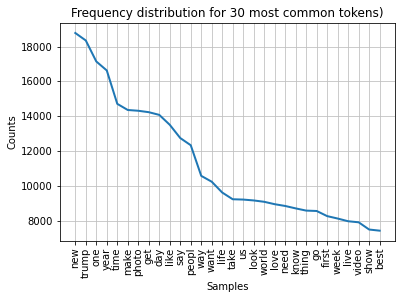

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
from nltk import FreqDist
fdist_filtered = FreqDist(words_except_stop_dist)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens)')

In [16]:
#pip install wordcloud

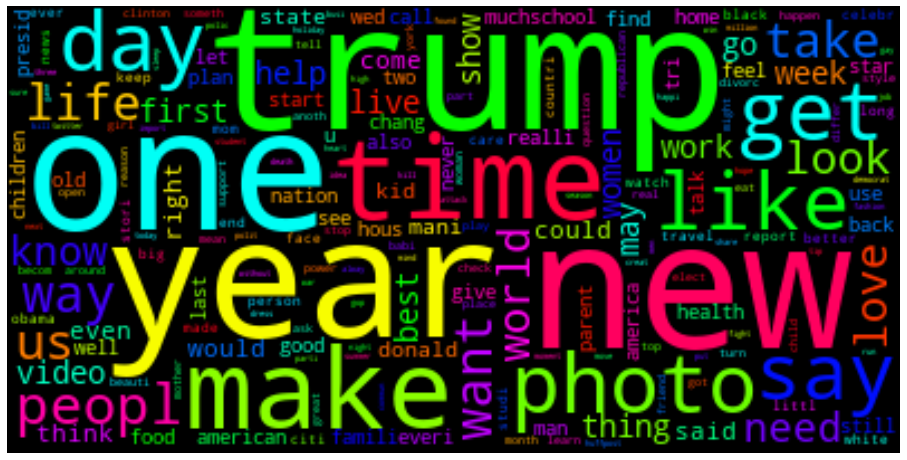

In [17]:
from collections import Counter
dictionary=Counter(words_except_stop_dist)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
news_data

,category,authors,link,date,X
0,CRIME,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed..."
1,ENTERTAINMENT,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-...,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a s...
2,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,2018-05-26,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Ebers...
3,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an as...
4,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,2018-05-26,"Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress s..."
...,...,...,...,...,...
200848,SCIENCE & TECHNOLOGY,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95c4e1,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry Verizon Wireless and AT&T are already...
200849,SPORTS,,https://www.huffingtonpost.com/entry/maria-sharapova-stunned-victoria-azarenka-australian-open_u...,2012-01-28,"Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final Afterward, Azarenka, more ..."
200850,SPORTS,,https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d,2012-01-28,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDE..."
200851,SPORTS,,https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted For DUI CORRECTION: An earlier version of this sto...


In [19]:
## converting corpus into series
corpus=pd.Series(corpus)

### Linear SVC with Count Vector

##### Appling count vector 

In [20]:
# Let's first try with Count Vectorizer from scikit learn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
corpus_cv = cv.fit_transform(corpus)

##### Spliting data into test and train

In [21]:
# Split the data into 70-30 i.e. test size of 30% to check the accuracy of the training
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(corpus_cv, y, test_size=0.3, random_state=77)

#Let's check the shape of the splitted data
print(f"Training Data Shape: {X_train_cv.shape}")
print(f"Testing Data Shape: {X_test_cv.shape}")

Training Data Shape: (140597, 58736)
Testing Data Shape: (60256, 58736)


In [22]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC_cv=LSVC.fit(X_train_cv,y_train_cv)
LSVC_cv_predict=LSVC_cv.predict(X_test_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [23]:
from sklearn import metrics
print('\033[1m' + "Confusion matrix  of Linear SVC Count Vector: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test_cv,LSVC_cv_predict))
print('\033[1m' + "\n \n \n Classification Report of  Linear SVC Count Vector: \n" + '\033[0m')
print(metrics.classification_report(y_test_cv,LSVC_cv_predict))
report=[]
tmp = pd.Series({'Model': " Linear SVC with CountVector ",
                 'Accuracy Score': metrics.accuracy_score(y_test_cv, LSVC_cv_predict),
                'Kappa Score': metrics.cohen_kappa_score(y_test_cv, LSVC_cv_predict)})
tmp_df = pd.DataFrame(tmp)
report = tmp_df.T
report

Confusion matrix  of Linear SVC Count Vector: 

[[ 478    7   15  153   12   15   11   13   33   35   45   14   29    4
    30   61   89   11   73   57]
 [   6  531   13   39   18    6    6   12   22   30  105   11    5   13
     7   11   83    2   21  110]
 [   7    8  241   18    5    7    0   16   42   40   87    9   10    8
     6    8   43    2   45   17]
 [ 102   45   17 4159   34   56   26   23   62  172  358   26   53   64
   190   59  345   61  183  217]
 [  11   18    9   40  481   20   17   29   35   29  143    8   45    8
    14   54   19    4   75  122]
 [  13    2    6   68   22 1781   35   17   54   49   27    9   11   14
    22  108   29    9  143   52]
 [  13    1    3   33   10   48  788    3   35   33   17    4   14    5
    49   43   15   10   55   14]
 [  10   10   18   33   36   10    7  269   57   69   91   14   20   15
    19   22   86   11  159   95]
 [  16   17   35   98   35   49   33   43 1167   99  281    9   56   21
    60   71   85   41  331   89]
 [  20 

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902


### Linear SVC with TfidfVectorizer with stop words after balancing data using smote

In [24]:
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
linear_SVC = imbPipeline([('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                     ('LSVC', LinearSVC())])
## converting corpus into series
corpus_having_stopwords=pd.Series(corpus_having_stopwords)
# Split the data into 70-30 i.e. test size of 30% to check the accuracy of the training
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(corpus_having_stopwords, y, test_size=0.3, random_state=77)

#Let's check the shape of the splitted data
print(f"Training Data Shape: {X_train_sw.shape}")
print(f"Testing Data Shape: {X_test_sw.shape}")
# Feed the training data through the pipeline
linear_SVC.fit(X_train_sw, y_train_sw)

Training Data Shape: (140597,)
Testing Data Shape: (60256,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                ('LSVC', LinearSVC())])

In [25]:
from sklearn import metrics
LSVC_Tfidf_sw_predict=linear_SVC.predict(X_test_sw)
print('\033[1m' + "Confusion matrix  of Linear SVC tfidf: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test_sw,LSVC_Tfidf_sw_predict))
print('\033[1m' + "\n \n \n Classification Report of tfidf: \n" + '\033[0m')
print(metrics.classification_report(y_test_sw,LSVC_Tfidf_sw_predict))
tmp = pd.Series({'Model': " Linear SVC Tfidf without removing stopword after appling smote",
                 'Accuracy Score': metrics.accuracy_score(y_test_sw, LSVC_Tfidf_sw_predict),
                'Kappa Score': metrics.cohen_kappa_score(y_test_sw, LSVC_Tfidf_sw_predict)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

Confusion matrix  of Linear SVC tfidf: 

[[ 600    7   13  114   21   14   13   23   34   28   31   13   19    5
    32   62   70    4   48   34]
 [   7  642   12   21   19    1    6   14   30   24   55   15   12   12
     8   12   62    1   13   85]
 [   7   10  303   16    3    6    6   31   30   43   48   10   11   12
     3    7   28    1   30   14]
 [ 155   51   21 4032   57   60   40   57   87  187  261   37   78  100
   188   67  337   88  134  215]
 [  14   17    5   23  636   13   14   50   32   17   77    6   42   11
     7   49   18    4   46  100]
 [  11    2    4   42   31 1931   46   18   60   44   13    6    8   13
    15   85   10    6   92   34]
 [  23    1    5   22    8   35  859   11   31   21    5    1    7    3
    46   38   10   14   37   16]
 [  16   12   35   22   49   11    5  369   69   77   47   19   18   14
    17   26   56    7  119   63]
 [  25   21   54   59   45   39   29   75 1374   97  151    7   76   25
    45   66   63   41  260   84]
 [  32   29   

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583


### Linear SVC with TfidfVectorizer with stop words

In [26]:
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
pd.options.display.max_seq_items = 2000
linear_SVC = imbPipeline([('tfidf', TfidfVectorizer()), ('LSVC', LinearSVC())])
## converting corpus into series
corpus_having_stopwords=pd.Series(corpus_having_stopwords)
# Split the data into 70-30 i.e. test size of 30% to check the accuracy of the training
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(corpus_having_stopwords, y, test_size=0.3, random_state=77)

#Let's check the shape of the splitted data
print(f"Training Data Shape: {X_train_sw.shape}")
print(f"Testing Data Shape: {X_test_sw.shape}")
# Feed the training data through the pipeline
linear_SVC.fit(X_train_sw, y_train_sw)

Training Data Shape: (140597,)
Testing Data Shape: (60256,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('LSVC', LinearSVC())])

In [27]:
from sklearn import metrics
LSVC_Tfidf_sw_predict=linear_SVC.predict(X_test_sw)
print('\033[1m' + "Confusion matrix  of Linear SVC tfidf: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test_sw,LSVC_Tfidf_sw_predict))
print('\033[1m' + "\n \n \n Classification Report of tfidf: \n" + '\033[0m')
print(metrics.classification_report(y_test_sw,LSVC_Tfidf_sw_predict))
tmp = pd.Series({'Model': " Linear SVC Tfidf without removing stopword",
                 'Accuracy Score': metrics.accuracy_score(y_test_sw, LSVC_Tfidf_sw_predict),
                'Kappa Score': metrics.cohen_kappa_score(y_test_sw, LSVC_Tfidf_sw_predict)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

Confusion matrix  of Linear SVC tfidf: 

[[ 547    4    8  165   11   10   12    6   30   35   52    9   16    4
    34   64   79    4   56   39]
 [   3  561    6   42   12    1    4    3   18   40  122    8    6    8
     8   13   55    1   17  123]
 [   6    8  254   17    1    6    0    5   29   46  101    4    8   10
     2    8   37    2   56   19]
 [  74   29    6 4445   27   45   23    6   50  151  351   18   43   66
   149   61  300   74  150  184]
 [   8   11    3   37  564   13    8   15   31   22  137    5   27    6
     8   56   13    3   88  126]
 [   7    0    1   57   14 1956   31    5   36   40   25    2    5    8
    15   80   17    6  137   29]
 [  12    0    2   37    8   37  844    1   24   25    4    1    1    3
    54   39   16    8   65   12]
 [   9    4   20   33   37   12    3  270   66   76   91    9   13   13
    18   26   72    3  187   89]
 [  14   13   25   86   26   42   21   19 1305  101  249    5   45   19
    43   66   50   39  375   93]
 [  21   17   

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583
0,Linear SVC Tfidf without removing stopword,0.683948,0.654042


### Linear SVC with TfidfVectorizer without stop words

In [28]:
linear_SVC = Pipeline([('tfidf', TfidfVectorizer()),
                     ('LSVC', LinearSVC())])
# Split the data into 70-30 i.e. test size of 30% to check the accuracy of the training
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.3, random_state=77)

#Let's check the shape of the splitted data
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
# Feed the training data through the pipeline
linear_SVC.fit(X_train, y_train)

Training Data Shape: (140597,)
Testing Data Shape: (60256,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('LSVC', LinearSVC())])

In [29]:
prediction_LSVC_tfidf=linear_SVC.predict(X_test)
print('\033[1m' + "Confusion matrix  of Linear SVC tfidf: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test,prediction_LSVC_tfidf))

Confusion matrix  of Linear SVC tfidf: 

[[ 536    2   10  155   12   15   13    7   32   29   45    8   15    2
    32   63   86    6   68   49]
 [   5  558   11   33   16    1    2    4   17   39  120   10    3   11
     3   12   67    4   24  111]
 [   8    4  255   18    2    4    2    8   40   47   89    4    9   14
     5    8   28    2   59   13]
 [  71   27    5 4435   27   46   22    5   53  156  350   19   48   53
   169   62  295   65  176  168]
 [   6    7    2   31  567   19   14   20   35   27  137    6   33   12
     5   61   12    2   70  115]
 [   8    2    0   59   12 1959   34    9   30   35   21    3    6   11
    21   75   18    6  126   36]
 [  14    1    3   31    6   43  857    0   22   23    9    2    6    5
    54   39   14    6   47   11]
 [   7    8   17   28   37   12    2  266   59   77   93    8   14   17
    16   24   69    3  208   86]
 [  11   14   28   81   25   47   24   20 1305  104  252    8   47   21
    49   69   64   30  355   82]
 [  23   22   

In [30]:
print('\033[1m' + "\n \n \n Classification Report of  Linear SVC tfidf: \n" + '\033[0m')
print(metrics.classification_report(y_test,prediction_LSVC_tfidf))


 
 
 Classification Report of  Linear SVC tfidf: 

                      precision    recall  f1-score   support

      ARTS & CULTURE       0.60      0.45      0.51      1185
               CRIME       0.59      0.53      0.56      1051
 EDUCATION & COLLEGE       0.47      0.41      0.44       619
       ENTERTAINMENT       0.67      0.71      0.69      6252
         ENVIRONMENT       0.53      0.48      0.50      1181
        FOOD & DRINK       0.75      0.79      0.77      2471
       HOME & LIVING       0.75      0.72      0.73      1193
              IMPACT       0.48      0.25      0.33      1051
    MONEY & BUSINESS       0.55      0.50      0.52      2636
           PARENTING       0.66      0.69      0.68      3858
            POLITICS       0.74      0.80      0.77      9871
            RELIGION       0.58      0.47      0.52       805
SCIENCE & TECHNOLOGY       0.58      0.47      0.52      1245
              SPORTS       0.71      0.71      0.71      1479
      STYLE & BEA

In [31]:
tmp = pd.Series({'Model': " Linear SVC Tfidf after removing stopword ",
                 'Accuracy Score': metrics.accuracy_score(y_test, prediction_LSVC_tfidf),
                'Kappa Score': metrics.cohen_kappa_score(y_test, prediction_LSVC_tfidf)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583
0,Linear SVC Tfidf without removing stopword,0.683948,0.654042
0,Linear SVC Tfidf after removing stopword,0.680729,0.650593


### Naive Bayes with Count Vectorizer

In [32]:
from sklearn.naive_bayes import  MultinomialNB
NB = MultinomialNB()
NB_cv=NB.fit(X_train_cv,y_train_cv)
NB_cv_predict=NB_cv.predict(X_test_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
print('\033[1m' + "Confusion matrix  of Naive Bayes count vector: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test_cv,NB_cv_predict))
print('\033[1m' + "\n \n \n Classification Report of  Naive Bayes count vector: \n" + '\033[0m')
print(metrics.classification_report(y_test_cv,NB_cv_predict))

tmp = pd.Series({'Model': "  Naive Bayes count vector ",
                 'Accuracy Score': metrics.accuracy_score(y_test_cv,NB_cv_predict),
                'Kappa Score': metrics.cohen_kappa_score(y_test_cv,NB_cv_predict)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

Confusion matrix  of Naive Bayes count vector: 

[[ 271    0    3  265    8   10    7    2   18   60   48    2    6    2
    52  121  165    5  101   39]
 [   1  434    1   45    6    1    1    0    9   51  188    0    0    1
     2   17  112    2   26  154]
 [   2    6   46   19    0    2    1    2   75   80  170    0    0    3
     1    6   71    2  118   15]
 [  17   25    1 4420    2   36    2    0   41  225  447    5   10   24
   233   83  309   62  232   78]
 [   0    1    0   48  346   14    2    1   48   57  211    1   17    2
     5  114   13    1  173  127]
 [   2    0    0   57    4 1885   15    0   33   54   13    1    3    2
    22  122   17    5  220   16]
 [   2    0    0   46    4   47  618    0   35   64   10    0    0    1
   123   91   15   12  120    5]
 [   1    2    5   29   17    6    1   84   92   89  148    0    1    7
     6   28  121    2  324   88]
 [   4   11    2   75    6   32    1    3 1232  138  329    0    8    7
    31   66   69   16  530   76]
 [   3

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583
0,Linear SVC Tfidf without removing stopword,0.683948,0.654042
0,Linear SVC Tfidf after removing stopword,0.680729,0.650593
0,Naive Bayes count vector,0.645712,0.608885


### Naive Bayes with tfidf Vectorizer without stopwords

In [34]:
from sklearn.naive_bayes import MultinomialNB
NB = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
NB.fit(X_train, y_train) 
prediction_NB_tfidf = NB.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
print('\033[1m' + "Confusion matrix  of Naive Bayes tfidf: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test,prediction_NB_tfidf))
print('\033[1m' + "\n \n \n Classification Report of  Naive Bayes tfidf: \n" + '\033[0m')
print(metrics.classification_report(y_test,prediction_NB_tfidf))
print('\033[1m'+'\n \nAccuracy:'+'\033[0m' + str(metrics.accuracy_score(y_test,prediction_NB_tfidf)))
print('\033[1m'+ "Kappa: "+ '\033[0m'+ str(metrics.cohen_kappa_score(y_test, prediction_NB_tfidf)))

tmp = pd.Series({'Model': "  Naive Bayes tfidf without stopwords ",
                 'Accuracy Score': metrics.accuracy_score(y_test,prediction_NB_tfidf),
                'Kappa Score': metrics.cohen_kappa_score(y_test,prediction_NB_tfidf)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

Confusion matrix  of Naive Bayes tfidf: 

[[  17    0    0  418    0    5    0    0    1   23  191    0    0    0
    42   49  107    0  298   34]
 [   0    9    0   70    0    1    0    0    1   15  688    0    0    0
     1    9   44    0   52  161]
 [   0    0    0   22    0    2    0    0    4   19  368    0    0    0
     0    1   14    0  189    0]
 [   0    0    0 4598    0    8    0    0    2   73  908    0    0    1
    75   12  112    6  426   31]
 [   0    0    0   95    5    3    1    0    2   18  558    0    1    0
     2   44    3    1  315  133]
 [   0    0    0  132    0 1335    0    0    1   21  110    0    0    0
    22   60    8    1  770   11]
 [   0    0    0  131    0   26  144    0    5   35  118    0    0    0
   186   53   10    3  473    9]
 [   0    0    0   27    0    2    0    0    7   21  436    0    0    1
     4    3   31    0  480   39]
 [   0    0    0   96    0   10    1    0  239   38 1227    0    0    0
    17   17   17    3  944   27]
 [   0    0  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

      ARTS & CULTURE       0.89      0.01      0.03      1185
               CRIME       0.90      0.01      0.02      1051
 EDUCATION & COLLEGE       0.00      0.00      0.00       619
       ENTERTAINMENT       0.51      0.74      0.60      6252
         ENVIRONMENT       0.71      0.00      0.01      1181
        FOOD & DRINK       0.87      0.54      0.67      2471
       HOME & LIVING       0.98      0.12      0.21      1193
              IMPACT       0.00      0.00      0.00      1051
    MONEY & BUSINESS       0.78      0.09      0.16      2636
           PARENTING       0.70      0.36      0.48      3858
            POLITICS       0.45      0.95      0.61      9871
            RELIGION       1.00      0.01      0.01       805
SCIENCE & TECHNOLOGY       0.96      0.04      0.08      1245
              SPORTS       0.96      0.09      0.17      1479
      STYLE & BEAUTY       0.78      0.66      0.71      3489
       

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583
0,Linear SVC Tfidf without removing stopword,0.683948,0.654042
0,Linear SVC Tfidf after removing stopword,0.680729,0.650593
0,Naive Bayes count vector,0.645712,0.608885
0,Naive Bayes tfidf without stopwords,0.52106,0.45639


### Naive Bayes with tfidf Vectorizer with stopwords

In [36]:
NB.fit(X_train_sw, y_train_sw) 
prediction_NB_tfidf_sw = NB.predict(X_test_sw)
print('\033[1m' + "Confusion matrix  of Naive Bayes tfidf with stop words: \n" + '\033[0m')
print(metrics.confusion_matrix(y_test_sw,prediction_NB_tfidf_sw))
print('\033[1m' + "\n \n \n Classification Report of  Naive Bayes tfidf  with stop words: \n" + '\033[0m')
print(metrics.classification_report(y_test_sw,prediction_NB_tfidf_sw))
tmp = pd.Series({'Model': "  Naive Bayes tfidf  with stop words",
                 'Accuracy Score': metrics.accuracy_score(y_test_sw ,prediction_NB_tfidf_sw),
                 'Kappa Score': metrics.cohen_kappa_score(y_test_sw ,prediction_NB_tfidf_sw)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report.sort_values(by=['Accuracy Score'])
report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion matrix  of Naive Bayes tfidf with stop words: 

[[   8    0    0  391    0    2    0    0    0   17  256    0    0    0
    30   26   74    0  356   25]
 [   0    5    0   61    0    0    0    0    0   11  753    0    0    0
     2    5   30    0   54  130]
 [   0    0    0   13    0    0    0    0    2   11  362    0    0    0
     1    1    6    0  223    0]
 [   0    0    0 4490    0    2    0    0    1   46 1022    0    0    0
    64    2   68    3  541   13]
 [   0    0    0   96    2    1    0    0    1   12  602    0    1    0
     5   29    2    0  338   92]
 [   0    0    0  128    0  975    0    0    1   17  138    0    0    0
    14   36    3    0 1154    5]
 [   0    0    0  128    0   23   65    0    0   20  113    0    0    0
   151   33    5    1  649    5]
 [   0    0    0   26    0    0    0    0    2   13  438    0    0    0
     2    1   17    0  531   21]
 [   0    0    0   88    0    5    0    0  127   23 1259    0    0    0
    11    7    7    1 1092   1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

      ARTS & CULTURE       1.00      0.01      0.01      1185
               CRIME       1.00      0.00      0.01      1051
 EDUCATION & COLLEGE       0.00      0.00      0.00       619
       ENTERTAINMENT       0.51      0.72      0.60      6252
         ENVIRONMENT       0.67      0.00      0.00      1181
        FOOD & DRINK       0.89      0.39      0.55      2471
       HOME & LIVING       0.98      0.05      0.10      1193
              IMPACT       0.00      0.00      0.00      1051
    MONEY & BUSINESS       0.82      0.05      0.09      2636
           PARENTING       0.72      0.28      0.40      3858
            POLITICS       0.43      0.96      0.60      9871
            RELIGION       1.00      0.00      0.00       805
SCIENCE & TECHNOLOGY       0.96      0.02      0.04      1245
              SPORTS       0.99      0.05      0.09      1479
      STYLE & BEAUTY       0.81      0.60      0.69      3489
       

,Model,Accuracy Score,Kappa Score
0,Linear SVC with CountVector,0.633763,0.599902
0,Linear SVC Tfidf without removing stopword after appling smote,0.652035,0.622583
0,Linear SVC Tfidf without removing stopword,0.683948,0.654042
0,Linear SVC Tfidf after removing stopword,0.680729,0.650593
0,Naive Bayes count vector,0.645712,0.608885
0,Naive Bayes tfidf without stopwords,0.52106,0.45639
0,Naive Bayes tfidf with stop words,0.484948,0.412263


### Accuracy is better in linear SVC TfidfVectorizer without removing stopwords